In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_df=pd.read_csv('city_data.csv')
ride_df=pd.read_csv('ride_data.csv')
# print(city_df)
# ride_df


In [2]:
city_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [3]:
# Combine the data into a single dataset
combined_ride_df = pd.merge(ride_df, city_df, how='outer',on='city')
# Display the data table for preview
ride_by_city_df = combined_ride_df.groupby(['city'])
print(combined_ride_df)

                    city                 date   fare        ride_id  \
0     Lake Jonathanshire  2018-01-14 10:14:22  13.83  5739410935873   
1     Lake Jonathanshire  2018-04-07 20:51:11  31.25  4441251834598   
2     Lake Jonathanshire  2018-03-09 23:45:55  19.89  2389495660448   
3     Lake Jonathanshire  2018-04-07 18:09:21  24.28  7796805191168   
4     Lake Jonathanshire  2018-01-02 14:14:50  13.89   424254840012   
5     Lake Jonathanshire  2018-04-06 11:30:32  16.84  6164453571846   
6     Lake Jonathanshire  2018-03-21 00:18:34  37.95  8353656732934   
7     Lake Jonathanshire  2018-01-28 00:07:00   5.67  9756573174778   
8     Lake Jonathanshire  2018-01-24 12:24:22  34.65  3319117904437   
9     Lake Jonathanshire  2018-03-24 16:27:49  14.94  1670908453476   
10    Lake Jonathanshire  2018-04-11 22:10:30  12.81  5999870428814   
11    Lake Jonathanshire  2018-01-23 21:43:16  21.11  7711472105447   
12    Lake Jonathanshire  2018-01-29 00:19:07  41.05  6649692036139   
13    

## Bubble Plot of Ride Sharing Data

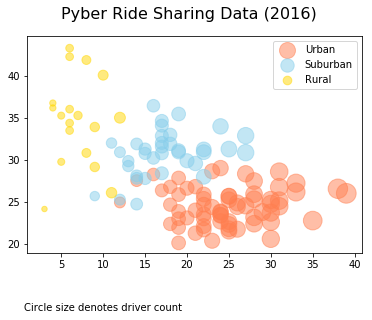

In [4]:
# Obtain the data frames for the city type(urban_rural,suburban) and then group the data frames by city
urban_cities = combined_ride_df[combined_ride_df["type"] == "Urban"].groupby([combined_ride_df["city"]])
rural_cities = combined_ride_df[combined_ride_df["type"] == "Rural"].groupby([combined_ride_df["city"]])
suburban_cities = combined_ride_df[combined_ride_df["type"] == "Suburban"].groupby([combined_ride_df["city"]])

#Ride count calculations
urban_rides=urban_cities['ride_id'].count()
suburban_rides=suburban_cities['ride_id'].count()
rural_rides=rural_cities['ride_id'].count()
#avg fair calculations
urban_fare=urban_cities['fare'].mean()
suburban_fare=suburban_cities['fare'].mean()
rural_fare=rural_cities['fare'].mean()
#drivercount
urban_drivers=urban_cities['driver_count'].count()
suburban_drivers=suburban_cities['driver_count'].count()
rural_drivers=rural_cities['driver_count'].count()

#Urban plot
plt.scatter(urban_rides, urban_fare, label = "Urban", s=urban_drivers * 10, color=["coral"], alpha = 0.5, marker="o")
# suburban plot
plt.scatter(suburban_rides, suburban_fare, label = "Suburban", s=suburban_drivers * 10, color=["skyblue"], alpha = 0.5, marker="o")
#rural plot
plt.scatter(rural_rides, rural_fare, label = "Rural", s=rural_drivers * 10, color=["gold"], alpha = 0.5, marker="o")
# Labels
# plt.title = ('Pyber Ride Sharing Data (2016)' )
plt.suptitle('Pyber Ride Sharing Data (2016)', fontsize=16)
plt.sup_xlabel = ('Average Fare by City in Dollars ($)' )
plt.sup_ylabel = ('Number of Rides per City' )
plt.text(.5,12,'Circle size denotes driver count')
plt.legend(loc='best')


In [5]:
# Show plot
plt.show()

## Total Fares by City Type

Text(0.5, 1.0, 'Percent of Total Fares by City Type')

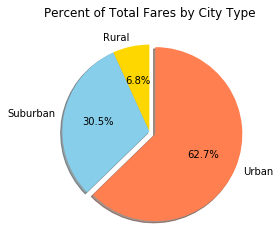

In [7]:
# Calculate Type Percents
#format float as percent
pd.options.display.float_format = '{0:.2f}%'.format
#create new DF grouped by city type
city_type_df = combined_ride_df.groupby(['type'])
#calculate total fares
total_fares = combined_ride_df['fare'].sum()
#Calculate total fares by city type
total_fare_by_type=city_type_df['fare'].sum()
#percent of total fares
pct_total_fare= (total_fare_by_type / total_fares)* 100
# Build Pie Chart
#label list
fare_labels = ['Rural','Suburban','Urban']
fare_colors = ['gold','skyblue','coral']
fare_explode = [ 0,0, .075]
#pie chart 
plt.pie(pct_total_fare, labels = fare_labels, colors = fare_colors, explode = fare_explode, shadow =True, startangle = 90, autopct='%.1f%%')
plt.title('Percent of Total Fares by City Type')
# Save Figure

In [ ]:
# Show Figure
plt.show()

## Total Rides by City Type

Text(0.5, 1.0, 'Percent of Total Rides by City Type')

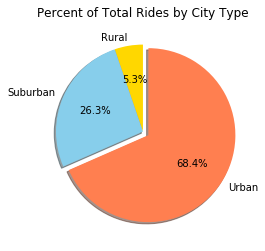

In [8]:
# Calculate Ride Percents
#format float as percent
pd.options.display.float_format = '{0:.2f}%'.format
#total rides
ride_total = combined_ride_df['ride_id'].count()
# Rides per city type
rides_by_type = city_type_df['ride_id'].count()
#percent of total rides by type
pct_total = (rides_by_type / ride_total) *100

# Build Pie Chart
ride_labels = ['Rural','Suburban','Urban']
ride_colors = ['gold','skyblue','coral']
ride_explode = [ 0,0, .075]
#pie chart 
plt.pie(pct_total, labels = ride_labels, colors = ride_colors, explode = ride_explode, shadow =True, startangle = 90, autopct='%.1f%%')
plt.title('Percent of Total Rides by City Type')

# Save Figure


In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents
#Format float as percents
pd.options.display.float_format = '{0:.2f}%'.format
#City data sorted by type
city_data_type_df = city_df.groupby(['type'])
#driver count
driver_total = city_df['driver_count'].sum()
#driver count by type
driver_type_count = city_data_type_df['driver_count'].sum()
#driver percent by type
driver_pct_type= (driver_type_count/driver_total)*100
# Build Pie Charts
driver_labels = ['Rural','Suburban','Urban']
driver_colors = ['gold','skyblue','coral']
driver_explode = [ 0,0, .075]
#pie chart 
plt.pie(driver_pct_type, labels = driver_labels, colors = driver_colors, explode = driver_explode, shadow =True, startangle = 110, autopct='%.1f%%')
plt.title('Percent of Total Drivers by City Type')
# Save Figure
print(driver_pct_type)

In [ ]:
# Show Figure
plt.show()